# Task 3
- Single complex neuron, stationary input dynamics, Oja rule.

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy.random as random

In [26]:
'''
Some constants and variables are named differently than in Task 0-2, in order to be consistent with the notes.
'''
N = 10 # number of presynaptic neurons
S = 5 # Number of dynamic variables defining each synapse
tau_W = 50 # time constant for weight updates
T = 800 # total simulation time
dt = 0.01 # time step length
y = random.randn(N, 1) # principle component
y = y / np.sqrt(y.T @ y)
epsilon = 1 # magnitude of noise
sigma = 1 # variance of s
alpha = 1
beta = 1
n = 2
T_e = 300 # time interval between changes of direction of y

W0 = 0.1 * random.randn(S, N) # weight vector initialisation
e1 = np.zeros((S, 1))
e1[0,0] = 1
P = e1 @ (e1.T)
L = np.zeros((S, S))
for a in range(S):
    L[a, a] = -beta * (n ** (-2*(a+1) + 1) * (n + 1))
    if a == 0:
         L[a, a] = -beta * (n ** (-2*(a+1) + 1))
    if a != 0:
        L[a, a-1] = beta * (n ** (-2*(a+1) + 2))
    if a != S-1:
        L[a, a+1] = beta * (n ** (-2*(a+1) + 1))

# e1 = random.randn(N, 1) # first principal component of input covariance
# e1 = e1 / np.sqrt(e1.T.dot(e1))
# e2 = random.randn(N, 1) 
# e2 = e2 - (e2.T.dot(e1).item()/e1.T.dot(e1).item())*e1 # second principal component of covariance
# e2 = e2 / np.sqrt(e2.T.dot(e2))






In [27]:
W = W0
w_history = []
w_norm_history = []
w_para_y_history = []
u_history = []

for t in np.arange(0, T, dt):

    if t % T_e == 0:
        y = random.randn(N, 1) # principal component
        y = y / np.sqrt(y.T.dot(y))

    s = sigma * random.randn(1)
    xi = epsilon * random.randn(N, 1)
    u = s * y + xi
    # v = u.dot(w)
    C = u @ (u.T)
    W = W + dt * (1/tau_W) * (L @ W + P @ W @ C - alpha * np.trace(P @ W @ C @ W.T) * P @ W)
    w = W.T @ e1
    w_history.append(w)
    u_history.append(u)
    w_norm_history.append(np.sqrt(w.T @ w))
    w_para_y_history.append(w.T @ y/np.sqrt(e1.T @ e1))
    # W2.append(w.dot(e2)/np.sqrt(e2.T.dot(e2)))

w_norm_history = np.array(w_norm_history)
w_norm_history = w_norm_history.squeeze()
w_para_y_history = np.array(w_para_y_history)
w_para_y_history = w_para_y_history.squeeze()

Text(0, 0.5, &#39;$|\\mathbf{w}|$&#39;)

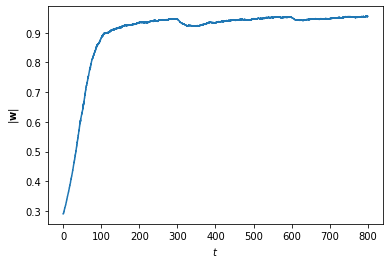

In [28]:
f1 = plt.figure(1)
plt.plot(np.arange(0, T, dt), w_norm_history)

plt.xlabel('$t$')
plt.ylabel('$|\mathbf{w}|$')

Text(0, 0.5, &#39;$\\cos(\\theta)$&#39;)

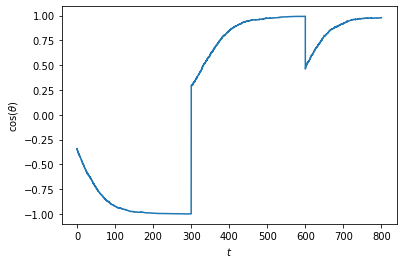

In [29]:
f2 = plt.figure(2)
plt.plot(np.arange(0, T, dt), w_para_y_history/w_norm_history)

plt.xlabel('$t$')
plt.ylabel('$\cos(\\theta)$')